c:\Users\loren\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\loren\AppData\Local\Temp\ipykernel_13644\4027985770.py:54: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network1 = KerasRegressor(build_fn=create_model, epochs=500, batch_size=35, verbose=1)


Epoch 1/500
62/62 [==============================] - 2s 7ms/step - loss: 485841835130880.0000 - val_loss: 614380307742720.0000
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 485837137510400.0000 - val_loss: 614365074030592.0000
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 485801234268160.0000 - val_loss: 614278839140352.0000
Epoch 4/500
62/62 [==============================] - 0s 4ms/step - loss: 485642890903552.0000 - val_loss: 613943898800128.0000
Epoch 5/500
62/62 [==============================] - 0s 4ms/step - loss: 485172357103616.0000 - val_loss: 613110675144704.0000
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 484158610604032.0000 - val_loss: 611499525537792.0000
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 482411196448768.0000 - val_loss: 608814499889152.0000
Epoch 8/500
62/62 [==============================] - 0s 4ms/step - loss: 479746773221376.0000 - val_loss: 60473

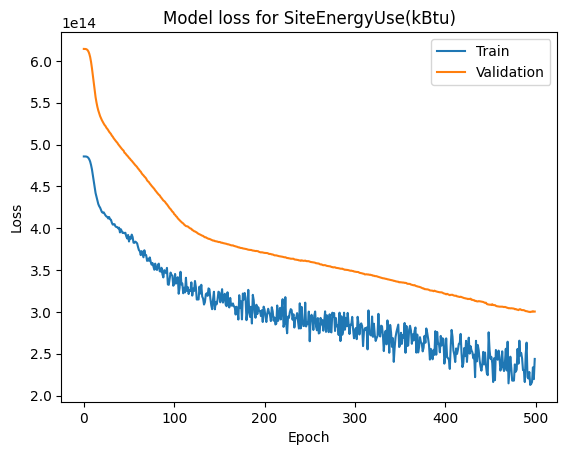

Epoch 1/500


C:\Users\loren\AppData\Local\Temp\ipykernel_13644\4027985770.py:73: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network2 = KerasRegressor(build_fn=create_model, epochs=500, batch_size=35, verbose=1)


62/62 [==============================] - 1s 5ms/step - loss: 155151.6719 - val_loss: 842401.2500
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 132736.4531 - val_loss: 794893.5625
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 120036.1328 - val_loss: 770134.1875
Epoch 4/500
62/62 [==============================] - 0s 3ms/step - loss: 111886.6875 - val_loss: 745111.2500
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 100686.3594 - val_loss: 719967.5625
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 88766.5156 - val_loss: 690564.0625
Epoch 7/500
62/62 [==============================] - 0s 3ms/step - loss: 88074.0469 - val_loss: 669922.6250
Epoch 8/500
62/62 [==============================] - 0s 3ms/step - loss: 78834.6250 - val_loss: 634945.8125
Epoch 9/500
62/62 [==============================] - 0s 3ms/step - loss: 81307.1016 - val_loss: 630148.3750
Epoch 10/500
62/62 [===============

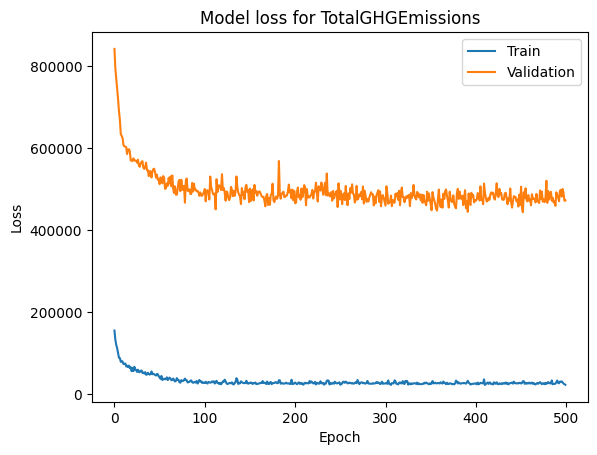

R2 Score for 'SiteEnergyUse(kBtu)':  0.5750740791912454
RMSE for 'SiteEnergyUse(kBtu)':  13209642.543418577
R2 Score for 'TotalGHGEmissions':  0.8492874164408382
RMSE for 'TotalGHGEmissions':  222.01319440131041


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset
df = pd.read_csv('C:/Users/loren/OneDrive/Documents/GitHub/co2/2016_Building_Energy_Benchmarking.csv')

# Suppression des NaN values du dataset
df = df[['LargestPropertyUseTypeGFA', 'PrimaryPropertyType', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].dropna()

# Appliquer la transformation log sur 'LargestPropertyUseTypeGFA'
df['LargestPropertyUseTypeGFA'] = np.log1p(df['LargestPropertyUseTypeGFA'])

# One-hot encoding pour 'PrimaryPropertyType'
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(df[['PrimaryPropertyType']]), index=df.index)
encoded_features.columns = encoder.get_feature_names_out(['PrimaryPropertyType'])

# Concaténation des caractéristiques encodées avec X
X = df.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PrimaryPropertyType'], axis=1)
X = pd.concat([X, encoded_features], axis=1)

y1 = df['SiteEnergyUse(kBtu)']
y2 = df['TotalGHGEmissions']

# Standardisation des caractéristiques
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Diviser les données en ensemble d'entraînement, de validation et de test
X_temp, X_test, y1_temp, y1_test, y2_temp, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)
X_train, X_val, y1_train, y1_val, y2_train, y2_val = train_test_split(X_temp, y1_temp, y2_temp, test_size=0.2, random_state=42)

# Définir le modèle de réseau de neurones
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))  # 20% dropout
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))  # 20% dropout
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))  # 20% dropout
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Envelopper le modèle Keras avec KerasRegressor pour l'utiliser avec scikit-learn
neural_network1 = KerasRegressor(build_fn=create_model, epochs=500, batch_size=35, verbose=1)

# Utiliser le réseau de neurones pour la première cible
history1 = neural_network1.fit(X_train, y1_train, validation_data=(X_val, y1_val))
y1_pred = neural_network1.predict(X_test)
r2_y1 = r2_score(y1_test, y1_pred)
rmse_y1 = mean_squared_error(y1_test, y1_pred, squared=False)

# Tracer le progrès de l'apprentissage pour la première cible
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss for SiteEnergyUse(kBtu)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Envelopper le modèle Keras avec KerasRegressor pour l'utiliser avec scikit-learn
neural_network2 = KerasRegressor(build_fn=create_model, epochs=500, batch_size=35, verbose=1)

# Utiliser le réseau de neurones pour la deuxième cible
history2 = neural_network2.fit(X_train, y2_train, validation_data=(X_val, y2_val))
y2_pred = neural_network2.predict(X_test)
r2_y2 = r2_score(y2_test, y2_pred)
rmse_y2 = mean_squared_error(y2_test, y2_pred, squared=False)

# Tracer le progrès de l'apprentissage pour la deuxième cible
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss for TotalGHGEmissions')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Sauvegarder les modèles
neural_network1.model.save('my_model1.h5')
neural_network2.model.save('my_model2.h5')

print("R2 Score for 'SiteEnergyUse(kBtu)': ", r2_y1)
print("RMSE for 'SiteEnergyUse(kBtu)': ", rmse_y1)
print("R2 Score for 'TotalGHGEmissions': ", r2_y2)
print("RMSE for 'TotalGHGEmissions': ", rmse_y2)

In [11]:
from keras.models import load_model
# Load the models
model1 = load_model('my_model1.h5')
model2 = load_model('my_model2.h5')

# New raw data
raw_data = {'LargestPropertyUseTypeGFA': [100000], 'PrimaryPropertyType': ['Hotel']}

# Create a DataFrame from raw data
new_data = pd.DataFrame(raw_data)

# Apply log1p transformation to 'LargestPropertyUseTypeGFA'
new_data['LargestPropertyUseTypeGFA'] = np.log1p(new_data['LargestPropertyUseTypeGFA'])

# Apply one-hot encoding to 'PrimaryPropertyType'
new_encoded_features = pd.DataFrame(encoder.transform(new_data[['PrimaryPropertyType']]), index=new_data.index)
new_encoded_features.columns = encoder.get_feature_names_out(['PrimaryPropertyType'])

# Concatenate the encoded features with new_data
new_data = new_data.drop(['PrimaryPropertyType'], axis=1)
new_data = pd.concat([new_data, new_encoded_features], axis=1)

# Standardize features
new_data = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)

# Use the loaded models to make predictions
prediction1 = model1.predict(new_data)
prediction2 = model2.predict(new_data)

print("Predicted 'SiteEnergyUse(kBtu)': ", prediction1[0])
print("Predicted 'TotalGHGEmissions': ", prediction2[0])

1/1 [==============================] - 0s 106ms/step
Predicted 'SiteEnergyUse(kBtu)':  [7742072.]
Predicted 'TotalGHGEmissions':  [227.36476]
